# Sentiment Analysis using Machine Learning Algorithms

## Dataset

In [1]:
import numpy as np
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
class Sentiment:
    NEGATIVE = "NEGATIVE"
    NEUTRAL = "NEUTRAL"
    POSITIVE = "POSITIVE"

class Review:
    def __init__(self, text, score):
        self.text = text
        self.score = score
        self.sentiment = self.get_sentiment()
        
    def get_sentiment(self):
        if self.score <= 2:
            return Sentiment.NEGATIVE
        elif self.score == 3:
            return Sentiment.NEUTRAL
        else: #Score of 4 or 5
            return Sentiment.POSITIVE
        
        
file_name = '/Users/kritya/Downloads/Books_large.json'

reviews = []
with open(file_name) as f:
    for line in f:
        review = json.loads(line)
        reviews.append(Review(review["reviewText"], review["overall"]))
        
print('Review : \n', reviews[0].text)
print('Sentiment :', reviews[0].sentiment)


Review : 
 I bought both boxed sets, books 1-5.  Really a great series!  Start book 1 three weeks ago and just finished book 5.  Sloane Monroe is a great character and being able to follow her through both private life and her PI life gets a reader very involved!  Although clues may be right in front of the reader, there are twists and turns that keep one guessing until the last page!  These are books you won't be disappointed with.
Sentiment : POSITIVE


In [3]:
from sklearn.model_selection import train_test_split

training, test = train_test_split(reviews, test_size=0.20, random_state=82)

train_x = [x.text for x in training]
train_y = [x.sentiment for x in training]

test_x = [x.text for x in test]
test_y = [x.sentiment for x in test]

In [4]:
class ReviewContainer:
    def __init__(self, reviews):
        self.reviews = reviews
        
    def get_text(self):
        return [x.text for x in self.reviews]
    
    def get_sentiment(self):
        return [x.sentiment for x in self.reviews]
        
    def evenly_distribute(self):
        negative = list(filter(lambda x: x.sentiment == Sentiment.NEGATIVE, self.reviews))
        positive = list(filter(lambda x: x.sentiment == Sentiment.POSITIVE, self.reviews))
        neutral = list(filter(lambda x: x.sentiment == Sentiment.NEUTRAL, self.reviews))
        positive_shrunk = positive[:len(negative)]
        neutral_shrunk = neutral[:len(negative)]
        self.reviews = negative + positive_shrunk + neutral_shrunk
        np.random.shuffle(self.reviews)

In [5]:
reviews_container = ReviewContainer(reviews)

#reviews_container.evenly_distribute()
text = reviews_container.get_text()
sentiment = reviews_container.get_sentiment()

In [6]:
Dataset = pd.DataFrame({
    'Reviews':text,
    'Sentiment':sentiment
})

In [7]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Reviews    10000 non-null  object
 1   Sentiment  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


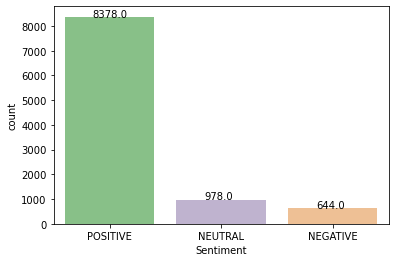

In [8]:
positive = sentiment.count(Sentiment.POSITIVE)
negative = sentiment.count(Sentiment.NEGATIVE)
neutral = sentiment.count(Sentiment.NEUTRAL)

ax = sns.countplot(x ='Sentiment', data = Dataset, palette = "Accent")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

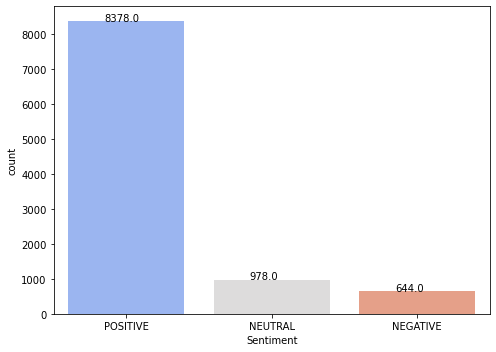

In [9]:
plt.rcParams["figure.figsize"] = [7, 5]
plt.rcParams["figure.autolayout"] = True

ax = sns.countplot(x ='Sentiment', data = Dataset, palette = "coolwarm")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))



## Pre-Processing

In [10]:
#train_x
#train_x

from tqdm import tqdm
from sklearn.model_selection import train_test_split
import nltk
from nltk import pos_tag, word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from bs4 import BeautifulSoup
import re

def posTag(review):
    tagged_text_list=[]
    for text in review:
        tagged_text_list.append(pos_tag(word_tokenize(text)))
    return tagged_text_list

def filterTag(tagged_review):
    final_text_list=[]
    for text_list in tagged_review:
        final_text=[]
        for word,tag in text_list:
            if tag in ['NN','NNS','NNP','NNPS','RB','RBR','RBS','JJ','JJR','JJS','VB','VBD','VBG','VBN','VBP','VBZ']:
                final_text.append(word)
        final_text_list.append(' '.join(final_text))
    return final_text_list

def clean_sentences(df):
    reviews = []

    for sent in tqdm(df):
        
        #remove html content
        review_text = BeautifulSoup(sent).get_text()
        
        #remove non-alphabetic characters
        review_text = re.sub("[.,/\)(!?:;-='_...""@#_]", " ", review_text)
    
        reviews.append(review_text)

    return(reviews)

train_x = clean_sentences(train_x)
train_x = posTag(train_x)
train_x = filterTag(train_x)

test_x = clean_sentences(test_x)
test_x = posTag(test_x)
test_x = filterTag(test_x)

100%|██████████| 2000/2000 [00:00<00:00, 5803.58it/s]


In [11]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
train_x_vectors = vectorizer.fit_transform(train_x)

test_x_vectors = vectorizer.transform(test_x)

print(train_x[0])
print(train_x_vectors[0].toarray())

Tom Corson-Knowles makes complicated simple Need say more walks techniques producing manuscript conception right finished product ready publish Amazon Great book Thanks
[[0. 0. 0. ... 0. 0. 0.]]


## Logistic Regression

In [12]:
# classification using logistic regression model

from sklearn.linear_model import LogisticRegression
%time

clf_log = LogisticRegression()
clf_log.fit(train_x_vectors, train_y)

print(f'Sample test review : \n "{test_x[7]}"')

print('Prediction using Logistic Regression :', clf_log.predict(test_x_vectors[7])[0])

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 2.86 µs
Sample test review : 
 "fiancee are trying do things healthy days eating eggs source know has nothing do GMOs is latest addition book is full info beginners need even limited space coops agree Dr Stone s comment raising chickens gardening going hand hand feed chickens kitchen vegetable scraps thus get fertilizer return m unsure is advise allow chickens run garden couple hours day did about minutes chickens were close eliminating tomato plants are privvy large coop intend add more neighbors are loving fresh eggs maybe not so much rooster wake calls Thankfully live community lake most homeowners only visit weekends read only chickens be raised certain city limits wonder book works themI appreciated section avoiding loss are many animals chickens snakes being worst waterfront community"
Prediction using Logistic Regression : POSITIVE


In [13]:
# Calculate Metrics
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
print('LOGISTIC REGRESSION OF UNBALANCED SENTIMENT DATASET\n')
print(f'Mean accuracy of Logistic Regression : {clf_log.score(test_x_vectors, test_y)}')

print('Precision Score: ',precision_score(test_y, clf_log.predict(test_x_vectors), average=None,labels=[Sentiment.POSITIVE, Sentiment.NEGATIVE, Sentiment.NEUTRAL]))

print('Recall: ', recall_score(test_y, clf_log.predict(test_x_vectors), average=None, labels=[Sentiment.POSITIVE, Sentiment.NEGATIVE, Sentiment.NEUTRAL]))

print('Logistic regression f1 score for POS, NEG and NEU :',f1_score(test_y, clf_log.predict(test_x_vectors), average=None, labels=[Sentiment.POSITIVE, Sentiment.NEGATIVE, Sentiment.NEUTRAL]))

print(classification_report(test_y, clf_log.predict(test_x_vectors)))

LOGISTIC REGRESSION OF UNBALANCED SENTIMENT DATASET

Mean accuracy of Logistic Regression : 0.834
Precision Score:  [0.84324884 0.7826087  0.45454545]
Recall:  [0.99390244 0.11764706 0.09661836]
Logistic regression f1 score for POS, NEG and NEU : [0.91239854 0.20454545 0.15936255]
              precision    recall  f1-score   support

    NEGATIVE       0.78      0.12      0.20       153
     NEUTRAL       0.45      0.10      0.16       207
    POSITIVE       0.84      0.99      0.91      1640

    accuracy                           0.83      2000
   macro avg       0.69      0.40      0.43      2000
weighted avg       0.80      0.83      0.78      2000



<AxesSubplot:>

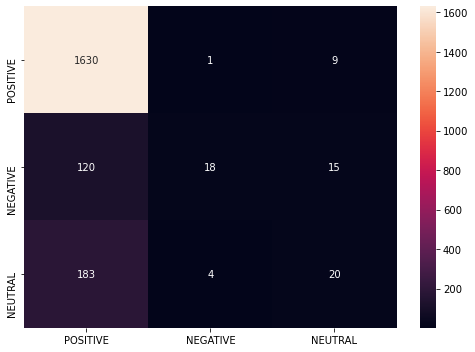

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib as plt

y_pred = clf_log.predict(test_x_vectors)

labels = [Sentiment.POSITIVE, Sentiment.NEGATIVE, Sentiment.NEUTRAL]

cm = confusion_matrix(test_y, y_pred, labels=labels)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

sns.heatmap(df_cm, annot=True, fmt='d')

## Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

%time
rf = RandomForestClassifier(random_state=67, criterion="gini", class_weight ="balanced")
params = {
    'max_depth': [1,2,3,5,10,20],
    'min_samples_leaf': [1,5,10,25,50,200],
    'n_estimators': [10,25,30,50,100,200]
}
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=4, scoring="accuracy")
grid_search.fit(train_x_vectors, train_y)
grid_search.best_score_ 

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 4.77 µs
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 581 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 850 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  1.1min finished


0.8462500000000001

In [16]:
# Calculate Metrics
from sklearn.metrics import f1_score, precision_score, recall_score
print('RANDOM FOREST OF UNBALANCED SENTIMENT DATASET\n')
print(f'Mean accuracy of Random Forest : {grid_search.score(test_x_vectors, test_y)}')

print('Precision Score: ',precision_score(test_y, grid_search.predict(test_x_vectors), average=None,labels=[Sentiment.POSITIVE, Sentiment.NEGATIVE, Sentiment.NEUTRAL]))

print('Recall: ', recall_score(test_y, grid_search.predict(test_x_vectors), average=None, labels=[Sentiment.POSITIVE, Sentiment.NEGATIVE, Sentiment.NEUTRAL]))

print('Random Forest f1 score for POS, NEG and NEU :',f1_score(test_y, grid_search.predict(test_x_vectors), average=None, labels=[Sentiment.POSITIVE, Sentiment.NEGATIVE, Sentiment.NEUTRAL]))

print(classification_report(test_y, grid_search.predict(test_x_vectors)))

RANDOM FOREST OF UNBALANCED SENTIMENT DATASET

Mean accuracy of Random Forest : 0.828
Precision Score:  [0.85775631 0.63043478 0.31868132]
Recall:  [0.97439024 0.18954248 0.14009662]
Random Forest f1 score for POS, NEG and NEU : [0.91236083 0.29145729 0.19463087]
              precision    recall  f1-score   support

    NEGATIVE       0.63      0.19      0.29       153
     NEUTRAL       0.32      0.14      0.19       207
    POSITIVE       0.86      0.97      0.91      1640

    accuracy                           0.83      2000
   macro avg       0.60      0.43      0.47      2000
weighted avg       0.78      0.83      0.79      2000



<AxesSubplot:>

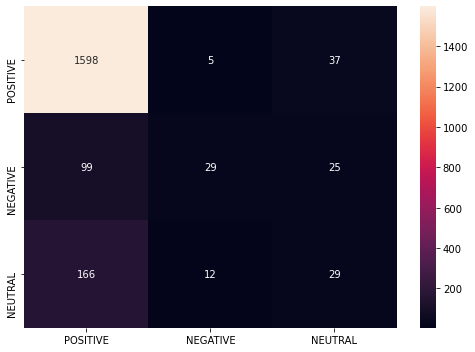

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib as plt

y_pred = grid_search.predict(test_x_vectors)

labels = [Sentiment.POSITIVE, Sentiment.NEGATIVE, Sentiment.NEUTRAL]

cm = confusion_matrix(test_y, y_pred, labels=labels)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

sns.heatmap(df_cm, annot=True, fmt='d')

# 

# 

# 

# 

# Removing Data Imbalance

In [18]:
class ReviewContainer:
    def __init__(self, reviews):
        self.reviews = reviews
        
    def get_text(self):
        return [x.text for x in self.reviews]
    
    def get_sentiment(self):
        return [x.sentiment for x in self.reviews]
        
    def evenly_distribute(self):
        negative = list(filter(lambda x: x.sentiment == Sentiment.NEGATIVE, self.reviews))
        positive = list(filter(lambda x: x.sentiment == Sentiment.POSITIVE, self.reviews))
        neutral = list(filter(lambda x: x.sentiment == Sentiment.NEUTRAL, self.reviews))
        positive_shrunk = positive[:len(negative)]
        neutral_shrunk = neutral[:len(negative)]
        self.reviews = negative + positive_shrunk + neutral_shrunk
        np.random.shuffle(self.reviews)

In [19]:
train_container = ReviewContainer(training)
test_container = ReviewContainer(test)

train_container.evenly_distribute()
train_x = train_container.get_text()
train_y = train_container.get_sentiment()

test_container.evenly_distribute()
test_x = test_container.get_text()
test_y = test_container.get_sentiment()

print(train_y.count(Sentiment.POSITIVE))
print(train_y.count(Sentiment.NEGATIVE))
print(train_y.count(Sentiment.NEUTRAL))

491
491
491


## Pre-Processing

In [23]:
#train_x
#train_x

from tqdm import tqdm
from sklearn.model_selection import train_test_split
import nltk
from nltk import pos_tag, word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from bs4 import BeautifulSoup
import re

def posTag(review):
    tagged_text_list=[]
    for text in review:
        tagged_text_list.append(pos_tag(word_tokenize(text)))
    return tagged_text_list

def filterTag(tagged_review):
    final_text_list=[]
    for text_list in tagged_review:
        final_text=[]
        for word,tag in text_list:
            if tag in ['NN','NNS','NNP','NNPS','RB','RBR','RBS','JJ','JJR','JJS','VB','VBD','VBG','VBN','VBP','VBZ']:
                final_text.append(word)
        final_text_list.append(' '.join(final_text))
    return final_text_list

def clean_sentences(df):
    reviews = []

    for sent in tqdm(df):
        
        #remove html content
        review_text = BeautifulSoup(sent).get_text()
        
        #remove non-alphabetic characters
        review_text = re.sub("[.,/\)(!?:;-='_...""@#_]", " ", review_text)
    
        reviews.append(review_text)

    return(reviews)

train_x = clean_sentences(train_x)
train_x = posTag(train_x)
train_x = filterTag(train_x)

100%|██████████| 1473/1473 [00:00<00:00, 5529.20it/s]


In [24]:
test_x = clean_sentences(test_x)
test_x = posTag(test_x)
test_x = filterTag(test_x)

100%|██████████| 459/459 [00:00<00:00, 5122.54it/s]


In [25]:
# print(train_x)
# print(test_x)

In [26]:
#TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
train_x_vectors = vectorizer.fit_transform(train_x)

test_x_vectors = vectorizer.transform(test_x)

print(train_x[0])
print(train_x_vectors[0].toarray())

Warnings please graphic sex Amazon please come system let customers know are getting
[[0. 0. 0. ... 0. 0. 0.]]


## Logistic Regression

In [27]:
#classification using logistic regression model

from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression()
clf_log.fit(train_x_vectors, train_y)

print(f'Sample test review : \n "{test_x[7]}"')

print('Prediction using naive bayes :', clf_log.predict(test_x_vectors[7])[0])

Sample test review : 
 "am almost finish book great service great book love author Want buy books same Author"
Prediction using naive bayes : POSITIVE


In [28]:
# Calculate Metrics
from sklearn.metrics import f1_score, precision_score, recall_score
print('LOGISTIC REGRESSION OF BALANCED SENTIMENT DATASET\n')
print(f'Mean accuracy of Logistic Regression : {clf_log.score(test_x_vectors, test_y)}')

print('Precision Score: ',precision_score(test_y, clf_log.predict(test_x_vectors), average=None,labels=[Sentiment.POSITIVE, Sentiment.NEGATIVE, Sentiment.NEUTRAL]))

print('Recall: ', recall_score(test_y, clf_log.predict(test_x_vectors), average=None, labels=[Sentiment.POSITIVE, Sentiment.NEGATIVE, Sentiment.NEUTRAL]))

print('Logistic regression f1 score for POS, NEG and NEU :',f1_score(test_y, clf_log.predict(test_x_vectors), average=None, labels=[Sentiment.POSITIVE, Sentiment.NEGATIVE, Sentiment.NEUTRAL]))

print(classification_report(test_y, clf_log.predict(test_x_vectors)))

LOGISTIC REGRESSION OF BALANCED SENTIMENT DATASET

Mean accuracy of Logistic Regression : 0.6209150326797386
Precision Score:  [0.74657534 0.57988166 0.54166667]
Recall:  [0.7124183  0.64052288 0.50980392]
Logistic regression f1 score for POS, NEG and NEU : [0.72909699 0.60869565 0.52525253]
              precision    recall  f1-score   support

    NEGATIVE       0.58      0.64      0.61       153
     NEUTRAL       0.54      0.51      0.53       153
    POSITIVE       0.75      0.71      0.73       153

    accuracy                           0.62       459
   macro avg       0.62      0.62      0.62       459
weighted avg       0.62      0.62      0.62       459



<AxesSubplot:>

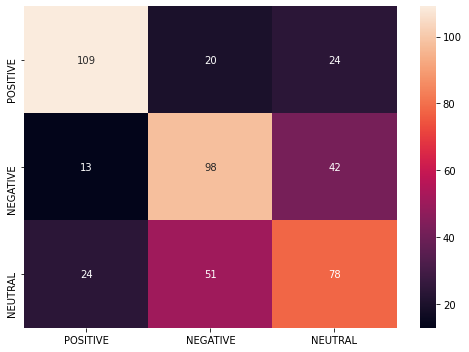

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib as plt

y_pred = clf_log.predict(test_x_vectors)

labels = [Sentiment.POSITIVE, Sentiment.NEGATIVE, Sentiment.NEUTRAL]

cm = confusion_matrix(test_y, y_pred, labels=labels)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

sns.heatmap(df_cm, annot=True, fmt='d')

## Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=67, criterion="gini")
params = {
    'max_depth': [1,2,3,5,10,20],
    'min_samples_leaf': [1,5,10,25,50,200],
    'n_estimators': [10,25,30,50,100,200]
}
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(train_x_vectors, train_y)
grid_search.best_score_ 

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 804 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 1049 out of 1080 | elapsed:   18.6s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:   19.2s finished


0.5960567277758562

In [31]:
# Calculate Metrics
from sklearn.metrics import f1_score, precision_score, recall_score
print('RANDOM FOREST OF BALANCED SENTIMENT DATASET\n')
print(f'Mean accuracy of Random Forest : {grid_search.score(test_x_vectors, test_y)}')

print('Precision Score: ',precision_score(test_y, grid_search.predict(test_x_vectors), average=None,labels=[Sentiment.POSITIVE, Sentiment.NEGATIVE, Sentiment.NEUTRAL]))

print('Recall: ', recall_score(test_y, grid_search.predict(test_x_vectors), average=None, labels=[Sentiment.POSITIVE, Sentiment.NEGATIVE, Sentiment.NEUTRAL]))

print('Random Forest f1 score for POS, NEG and NEU :',f1_score(test_y, grid_search.predict(test_x_vectors), average=None, labels=[Sentiment.POSITIVE, Sentiment.NEGATIVE, Sentiment.NEUTRAL]))

print(classification_report(test_y, grid_search.predict(test_x_vectors)))


RANDOM FOREST OF BALANCED SENTIMENT DATASET

Mean accuracy of Random Forest : 0.5925925925925926
Precision Score:  [0.68072289 0.54597701 0.53781513]
Recall:  [0.73856209 0.62091503 0.41830065]
Random Forest f1 score for POS, NEG and NEU : [0.70846395 0.58103976 0.47058824]
              precision    recall  f1-score   support

    NEGATIVE       0.55      0.62      0.58       153
     NEUTRAL       0.54      0.42      0.47       153
    POSITIVE       0.68      0.74      0.71       153

    accuracy                           0.59       459
   macro avg       0.59      0.59      0.59       459
weighted avg       0.59      0.59      0.59       459



<AxesSubplot:>

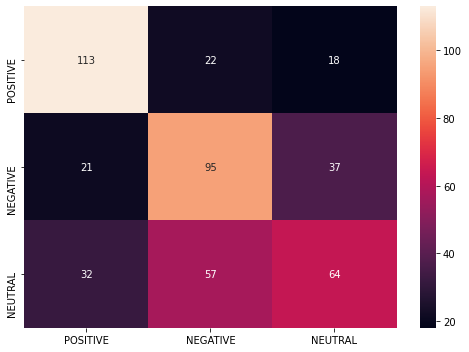

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib as plt

y_pred = grid_search.predict(test_x_vectors)

labels = [Sentiment.POSITIVE, Sentiment.NEGATIVE, Sentiment.NEUTRAL]

cm = confusion_matrix(test_y, y_pred, labels=labels)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

sns.heatmap(df_cm, annot=True, fmt='d')

## 

## 